<a href="https://colab.research.google.com/github/tharunsagar1/AIML-B4/blob/main/assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-9548d05c57cf>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train, palette='RdBu_r')
<ipython-input-2-9548d05c57cf>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')


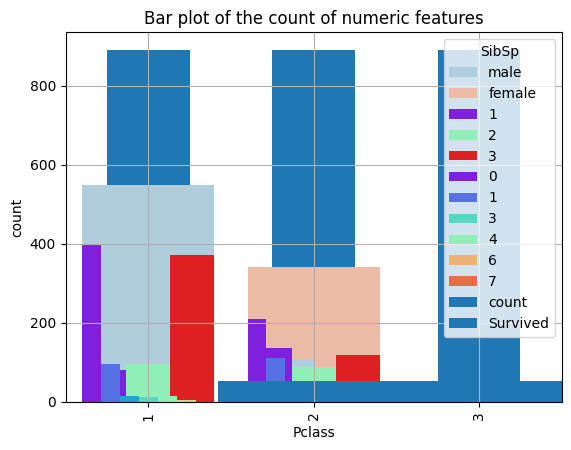

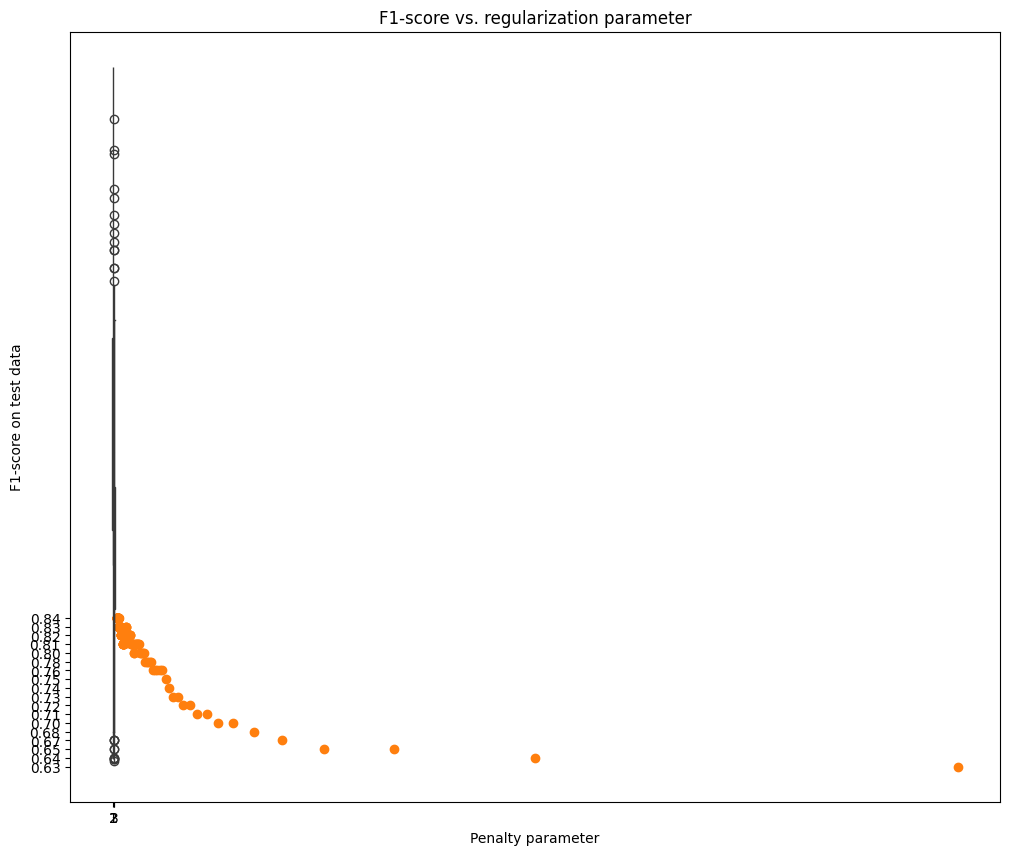

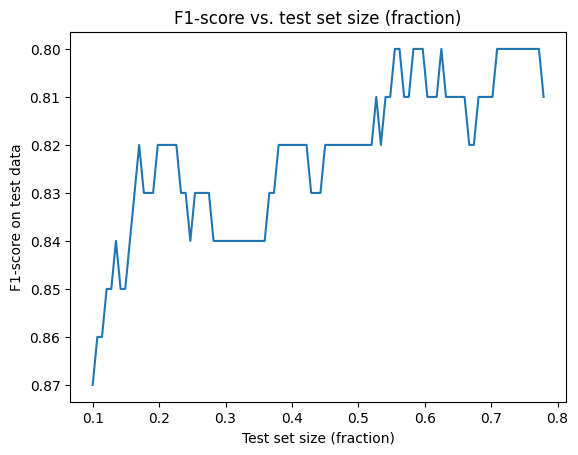

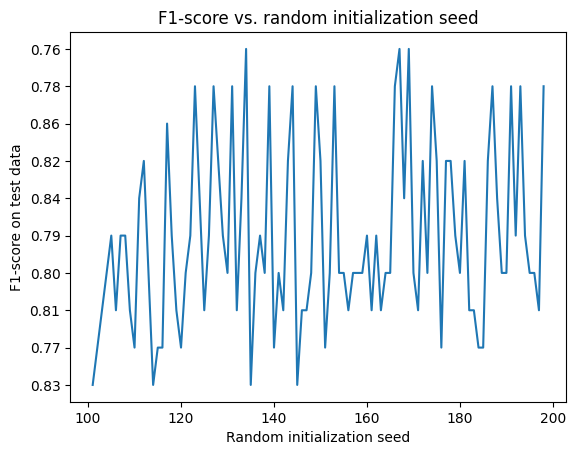

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Importing the dataset
train = pd.read_csv('/content/train.csv')

# Exploratory data analysis and plots
# Plot a bar diagram to check the number of numeric entries
dT = train.describe().T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features")

# Check the relative size of survived and not-survived
sns.countplot(x='Survived', data=train, palette='RdBu_r')

# Checking pattern for survivability based on sex
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

# Checking pattern related to passenger class
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')

# Extracting and plotting the fraction of passenger count that survived by each class
f_class_survived = train.groupby('Pclass')['Survived'].mean()
f_class_survived.plot.bar(y='Survived')

# Checking any pattern related to having sibling and spouse
sns.countplot(x='Survived', hue='SibSp', data=train, palette='rainbow')

# Plotting the overall age distribution
train['Age'].hist()

# Checking the age distribution across passenger class
plt.figure(figsize=(12, 10))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

# Data wrangling
# Impute age (by averaging)
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

# Drop unnecessary features
train.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
train.dropna(inplace=True)

# Convert categorical features to dummy variables
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

train.drop(['Sex', 'Embarked'], axis=1, inplace=True)
train = pd.concat([train, sex, embark], axis=1)

# Logistic Regression model fit and prediction
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'],
                                                    test_size=0.30, random_state=111)

# Fitting logistic regression models with different penalty parameters
nsimu = 201
penalty = [0] * nsimu
f1 = [0] * nsimu

for i in range(1, nsimu):
    logmodel = LogisticRegression(C=i/1000, tol=1e-4, max_iter=int(1e6), n_jobs=4)
    logmodel.fit(X_train, y_train)
    predictions = logmodel.predict(X_test)
    class_report = classification_report(y_test, predictions)
    l = class_report.split()
    f1[i] = l[len(l) - 2]
    penalty[i] = 1000 / i

plt.scatter(penalty[1:len(penalty)-2], f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter")
plt.xlabel("Penalty parameter")
plt.ylabel("F1-score on test data")
plt.show()

# F1-score as a function of test set size (fraction)
nsimu = 101
f1 = [0] * nsimu
test_fraction = [0] * nsimu

for i in range(1, nsimu):
    X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1),
                                                        train['Survived'], test_size=0.1 + (i - 1) * 0.007,
                                                        random_state=111)
    logmodel = LogisticRegression(C=1, tol=1e-4, max_iter=1000, n_jobs=4)
    logmodel.fit(X_train, y_train)
    predictions = logmodel.predict(X_test)
    class_report = classification_report(y_test, predictions)
    l = class_report.split()
    f1[i] = l[len(l) - 2]
    test_fraction[i] = 0.1 + (i - 1) * 0.007

plt.plot(test_fraction[1:len(test_fraction) - 2], f1[1:len(f1) - 2])
plt.title("F1-score vs. test set size (fraction)")
plt.xlabel("Test set size (fraction)")
plt.ylabel("F1-score on test data")
plt.show()

# F1-score as a function of random seed of test/train split
nsimu = 101
f1 = [0] * nsimu
random_init = [0] * nsimu

for i in range(1, nsimu):
    X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1),
                                                        train['Survived'], test_size=0.3,
                                                        random_state=i + 100)
    logmodel = LogisticRegression(C=1, tol=1e-5, max_iter=1000, n_jobs=4)
    logmodel.fit(X_train, y_train)
    predictions = logmodel.predict(X_test)
    class_report = classification_report(y_test, predictions)
    l = class_report.split()
    f1[i] = l[len(l) - 2]
    random_init[i] = i + 100

plt.plot(random_init[1:len(random_init) - 2], f1[1:len(f1) - 2])
plt.title("F1-score vs. random initialization seed")
plt.xlabel("Random initialization seed")
plt.ylabel("F1-score on test data")
plt.show()
